In [265]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook

In [266]:
#setting up parameters
#all in SI
G = 6.67*10**(-11)
M = 6*10**30 #idk, stereotypical mass of three solar masses i guess
c = 3*10**8 

r_s = 2*G*M/c**2

In [267]:
#calculating r at all timesteps
r = 10000
rlist = [r]

def getv(r):
    if r == r_s:
        return getv(r-100)
    return c*(1-r_s/r)

for t in range(200):
    v = getv(r)
    r_new = r - v*0.000003
    if r_new <= r_s:
        break
    rlist.append(r_new)
    r = r_new
    prevv = v
yvals = [0]*len(rlist)

<IPython.core.display.Javascript object>


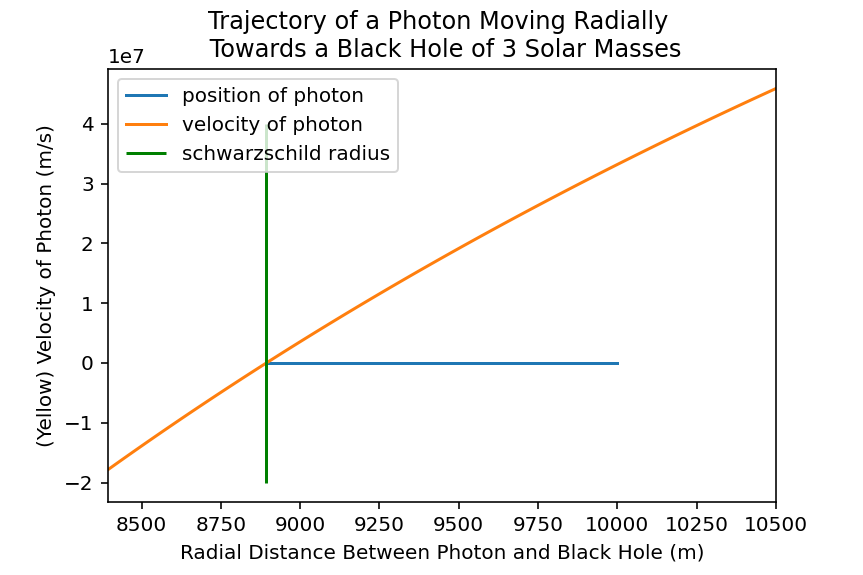

In [268]:
#plotting
fig, ax = plt.subplots()
ax.set_xlim(min(rlist) - 500, max(rlist) + 500)
animated_plot1, = ax.plot([],[], label="position of photon")

r = np.linspace(min(rlist) - 500, max(rlist) + 500,100)
velocity = c*(1-r_s/r)

ax.plot(r, velocity, label="velocity of photon")

ax.vlines(r_s, -2*10**7, 4*10**7, label = "schwarzschild radius", color="green")

ax.title.set_text('Trajectory of a Photon Moving Radially \n Towards a Black Hole of 3 Solar Masses')
ax.set_ylabel('(Yellow) Velocity of Photon (m/s)')
ax.set_xlabel("Radial Distance Between Photon and Black Hole (m)")
plt.legend()
plt.show()

#animation
def animate(frame):
    animated_plot1.set_data(rlist[:frame], yvals[:frame])
    return animated_plot1

ani = animation.FuncAnimation(fig = fig, func = animate, repeat=True,
                                    frames= len(rlist), interval=50)